# Business Analysis with EDA & Statistics

### Task Details

You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.


Section 01: Exploratory Data Analysis
    
Are there any null values or outliers? How will you wrangle/handle them?
Are there any variables that warrant transformations?
Are there any useful variables that you can engineer with the given data?
Do you notice any patterns or anomalies in the data? Can you plot them?

Section 02: Statistical Analysis
    
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

What factors are significantly related to the number of store purchases?
Does US fare significantly better than the Rest of the World in terms of total purchases?
Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
Is there a significant relationship between geographical regional and success of a campaign?

Section 03: Data Visualization
    
Please plot and visualize the answers to the below questions.

Which marketing campaign is most successful?
What does the average customer look like for this company?
Which products are performing best?
Which channels are underperforming?

Section 04: CMO Recommendations
    
Bring together everything from Sections 01 to 03 and provide data-driven recommendations/suggestions to your CMO.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set_context('notebook')
sns.set_style('whitegrid')
sns.set_palette('Blues_r')

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('datasets/marketing_data.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


#### Initial Data Cleaning

In [3]:
data.rename(columns={' Income ':'Income'},inplace=True)
data['Income'] = data['Income'].str.replace('$','').str.replace(',','')

In [4]:
data['Income'] = pd.to_numeric(data['Income'])
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

## Section 01: Exploratory Data Analysis

#### Are there any null values or outliers? 

In [5]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

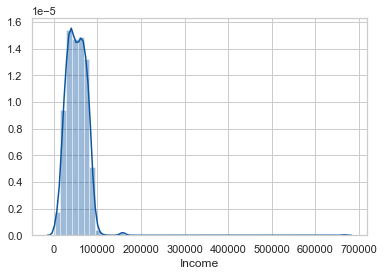

In [6]:
#There are 24 null values in Income column

#To decide the method of handling the null values we should plot the column data first

sns.distplot(data['Income'])

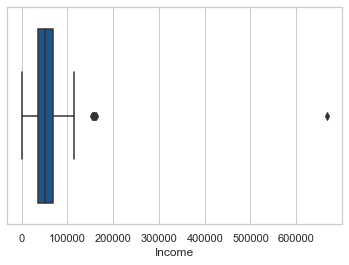

In [7]:
sns.boxplot(data['Income'])

In [8]:
#By the above plots we can see there are some extreme outliers in the data.
# So we can fill the null values in the column with the median inorder to avaoid the outliers

data['Income'] = data['Income'].fillna(data['Income'].median())

Outliers

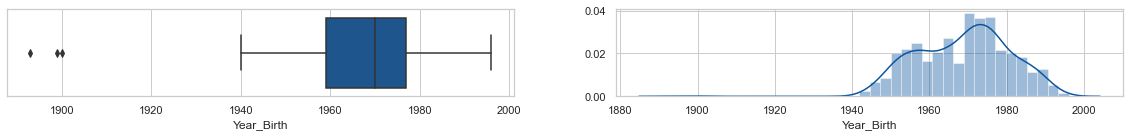

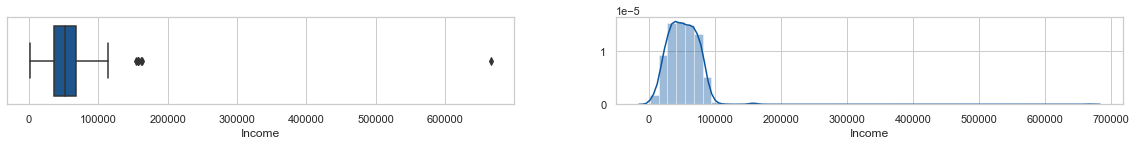

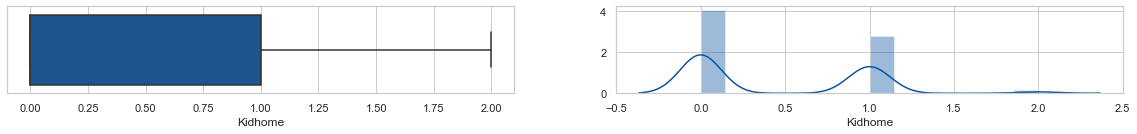

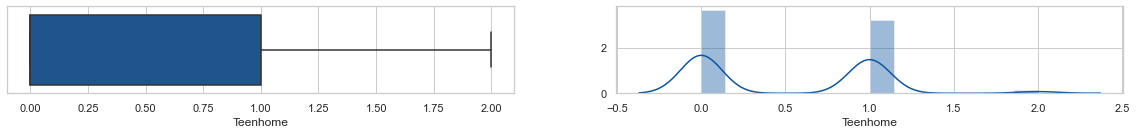

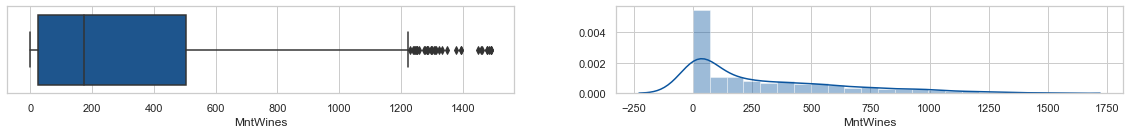

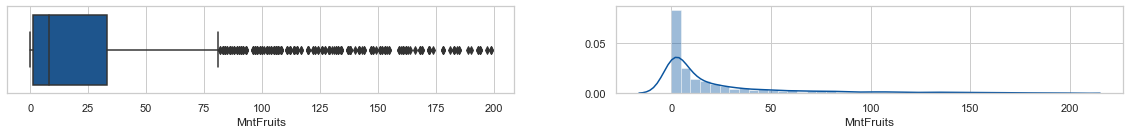

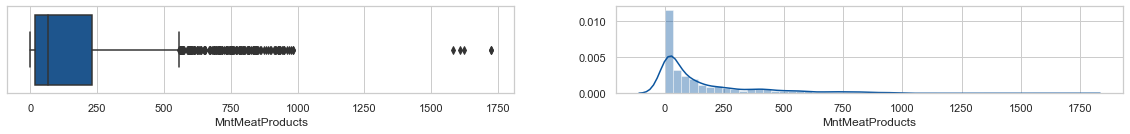

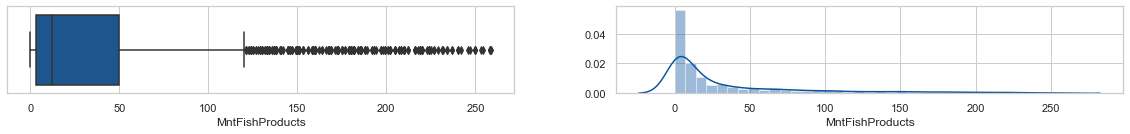

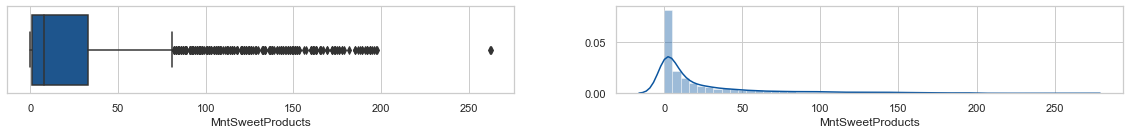

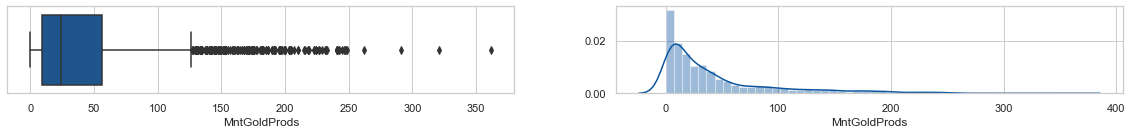

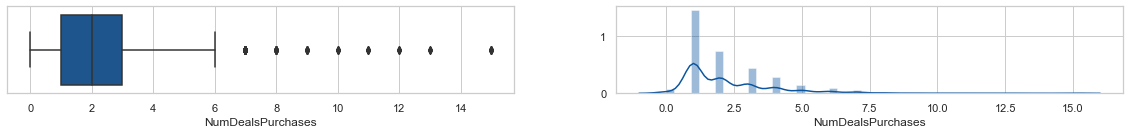

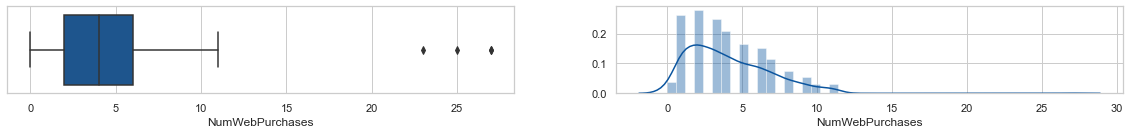

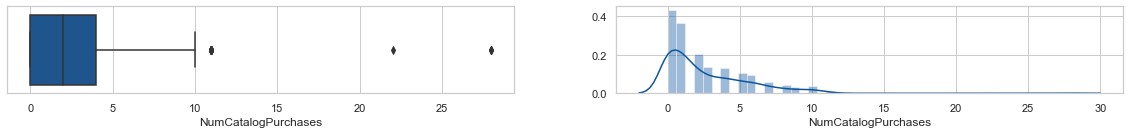

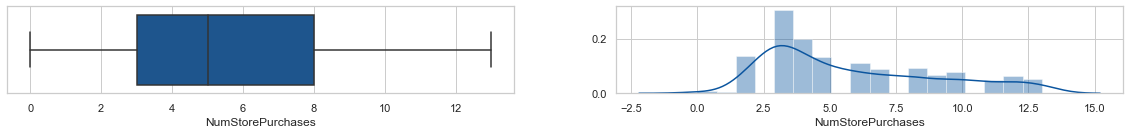

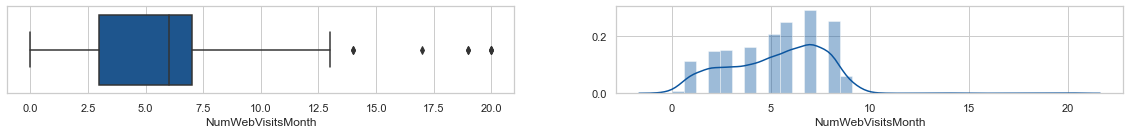

In [9]:
data_toPlot = data[['Year_Birth','Income','Kidhome','Teenhome','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
c = 1
for i in data_toPlot.columns:
    plt.figure(figsize=(20,40))
    
    plt.subplot(21,2,c)
    sns.boxplot(data_toPlot[i])
    
    c = c+1
    plt.subplot(21,2,c)
    sns.distplot(data_toPlot[i])
    c = c+1
    


In [10]:
data = data[data.Year_Birth > 1900]

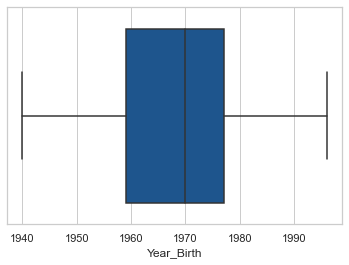

In [11]:
sns.boxplot(data.Year_Birth)

### Are there any variables that warrant transformations? 

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

In [13]:
#We already transdormed the necessary columns in the initial clean up stage

### Are there any useful variables that you can engineer with the given data?

In [14]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


In [15]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [16]:
data['Age']= 2021 - data.Year_Birth
data['Total_Dependents'] = data['Kidhome']+data['Teenhome']
data['Total_spent'] = data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']
data['Total_purchase'] = data['NumDealsPurchases']+data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']
data['Total_acc'] = data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['AcceptedCmp1']+data['AcceptedCmp2']

In [17]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_Dependents,Total_spent,Total_purchase,Total_acc
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,51,0,1190,15,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA,60,0,577,18,1
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US,63,1,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS,54,2,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP,32,1,91,8,1


### Do you notice any patterns or anomalies in the data? Can you plot them?

<Figure size 1080x1080 with 0 Axes>

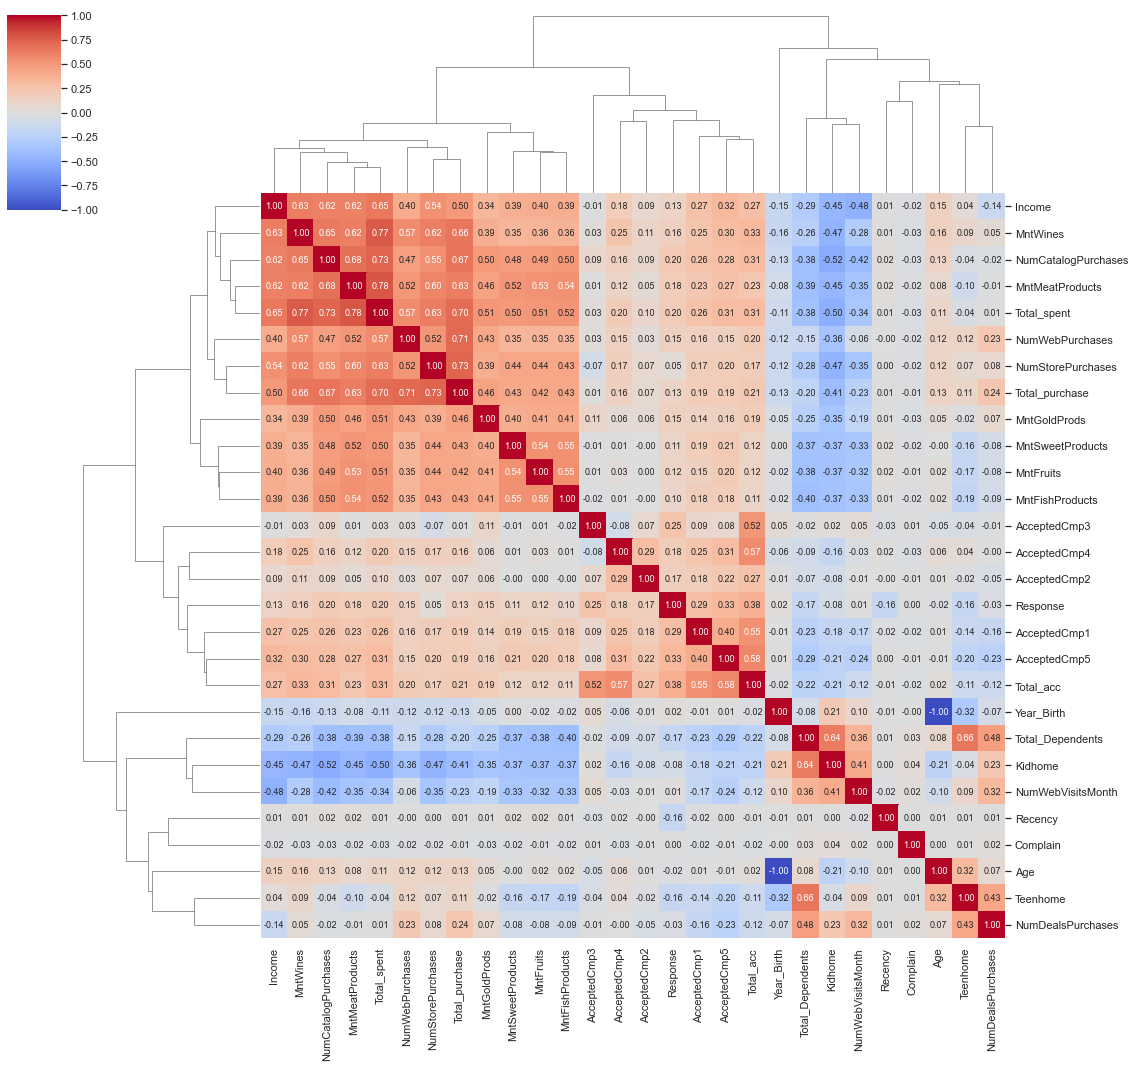

In [18]:
corrs = data.drop(columns='ID').select_dtypes(include=np.number).corr(method = 'kendall')
plt.figure(figsize=(15,15))
# plot clustered heatmap of correlations
sns.clustermap(corrs,figsize=(15,15), cbar_pos=(-0.05, 0.8, 0.05, 0.18), cmap='coolwarm', center=0,annot=True,fmt='.2f',annot_kws={"fontsize":9});

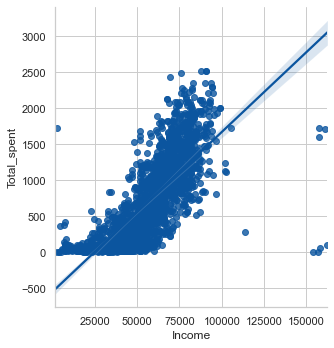

In [19]:
sns.lmplot(x='Income', y='Total_spent', data=data[data['Income'] < 200000])

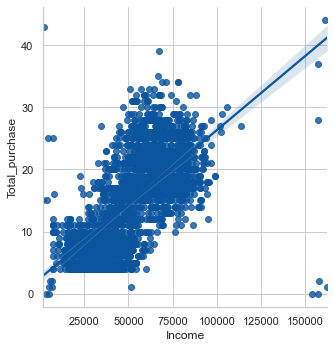

In [20]:
sns.lmplot(x='Income', y='Total_purchase', data=data[data['Income'] < 200000])

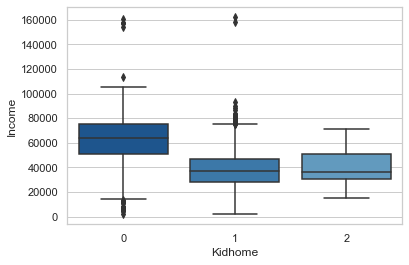

In [21]:
sns.boxplot(x='Kidhome', y='Income', data=data[data['Income'] < 200000])

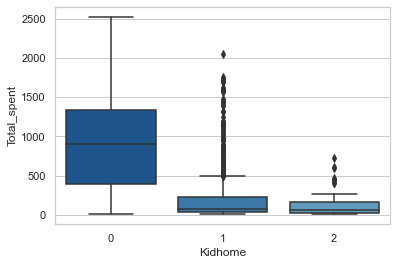

In [22]:
sns.boxplot(x='Kidhome', y='Total_spent', data=data[data['Income'] < 200000])

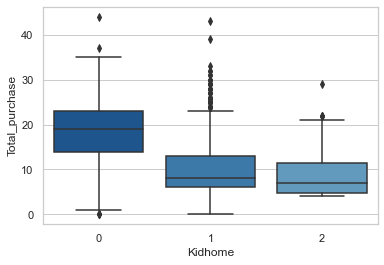

In [23]:
sns.boxplot(x='Kidhome', y='Total_purchase', data=data[data['Income'] < 200000])

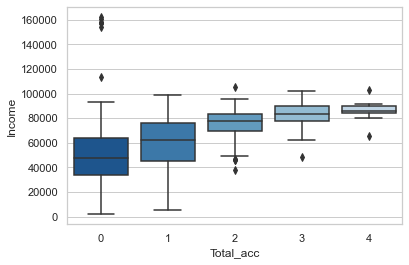

In [24]:
sns.boxplot(x='Total_acc', y='Income', data=data[data['Income'] < 200000])

### Section 02: Statistical Analysis


##### What factors are significantly related to the number of store purchases?

Text(0.5, 1.0, 'NumStorePurchases distribution')

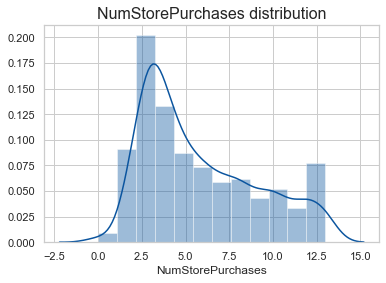

In [25]:
sns.distplot(data['NumStorePurchases'],kde=True, hist=True, bins=12)
plt.title('NumStorePurchases distribution', size=16)


In [26]:
data['Year_Customer'] = pd.DatetimeIndex(data['Dt_Customer']).year

In [27]:
# We will drop unwanted variables.
# 1.ID  2.Dt_Customer

In [28]:
data.drop(columns=['ID','Dt_Customer'],inplace=True)

In [29]:
#One hot encoding to convert categorical values to numeric data
from sklearn.preprocessing import OneHotEncoder

#getting the categorical columns from the dataframe and reviewing the number of unique values
df = data.select_dtypes(exclude=np.number)

df.nunique()

Education         5
Marital_Status    8
Country           8
dtype: int64

In [30]:
enc = OneHotEncoder(sparse=False).fit(df)
encoded_df = pd.DataFrame(enc.transform(df))
encoded_df.columns = enc.get_feature_names(df.columns)

#merge with numeric data

num = data.drop(columns = df.columns)
df2 = pd.concat([encoded_df,num],axis=1)
df2.head()


,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Age,Total_Dependents,Total_spent,Total_purchase,Total_acc,Year_Customer
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1970.0,84835.0,0.0,0.0,0.0,189.0,104.0,379.0,111.0,189.0,218.0,1.0,4.0,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,51.0,0.0,1190.0,15.0,0.0,2014.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1961.0,57091.0,0.0,0.0,0.0,464.0,5.0,64.0,7.0,0.0,37.0,1.0,7.0,3.0,7.0,5.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,60.0,0.0,577.0,18.0,1.0,2014.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1958.0,67267.0,0.0,1.0,0.0,134.0,11.0,59.0,15.0,2.0,30.0,1.0,3.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,1.0,251.0,11.0,0.0,2014.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1967.0,32474.0,1.0,1.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,2.0,11.0,4.0,0.0,2014.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1989.0,21474.0,1.0,0.0,0.0,6.0,16.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,32.0,1.0,91.0,8.0,1.0,2014.0


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


#isolating target variable
df2.dropna(inplace=True)
x = df2.drop(columns='NumStorePurchases')
y = df2['NumStorePurchases']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

#Building the linear model

model = LinearRegression()
model.fit(x_train,y_train)

#Predictions

pred = model.predict(x_test)



In [32]:
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, pred)))
print("Median value of target variable: ", y.median())


Linear regression model RMSE:  1.0309119393073655e-11
Median value of target variable:  5.0


In [33]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist(), top=5)

#### Does US fare significantly better than the Rest of the World in terms of total purchases?

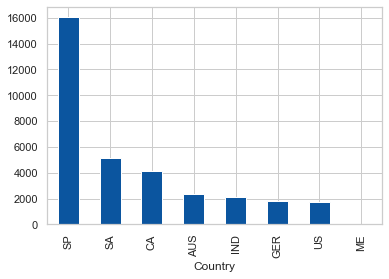

In [40]:
data.groupby('Country')['Total_purchase'].sum().sort_values(ascending=False).plot(kind='bar')

#### Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

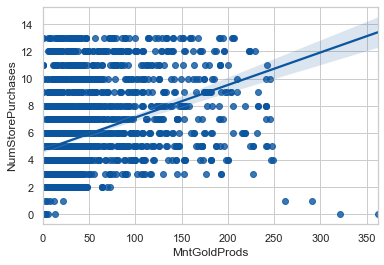

In [42]:
sns.regplot(data['MntGoldProds'],data['NumStorePurchases'])

In [43]:
from scipy.stats import kendalltau

In [46]:
kendall_corr = kendalltau(x=data['MntGoldProds'], y=data['NumStorePurchases'])
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


#### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish?

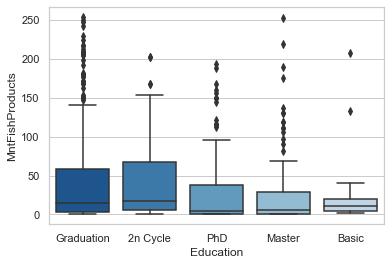

In [51]:
sns.boxplot(data.loc[data['Marital_Status']=='Married']['Education'],data['MntFishProducts'])

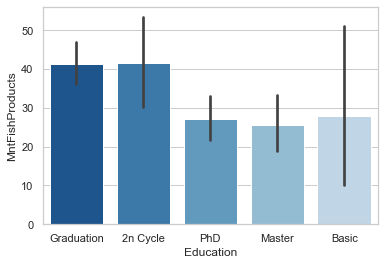

In [52]:
sns.barplot(data.loc[data['Marital_Status']=='Married']['Education'],data['MntFishProducts'])

In [53]:
# independent t-test p-value
from scipy.stats import ttest_ind

In [69]:
pval = ttest_ind(data.loc[(data['Marital_Status']=='Married') & (data['Education']=='PhD')]['MntFishProducts'],data.loc[(data['Marital_Status']=='Married') & (data['Education']!='PhD')]['MntFishProducts']).pvalue
print("t-test p-value: ", round(pval, 3))


t-test p-value:  0.012


#### What other factors are significantly related to amount spent on fish?

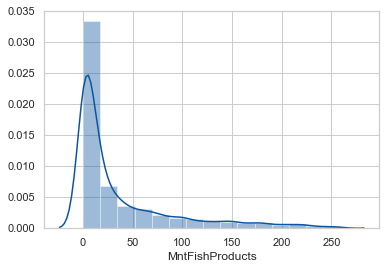

In [73]:
sns.distplot(data['MntFishProducts'],bins=15)

#### Is there a significant relationship between geographical regional and success of a campaign?

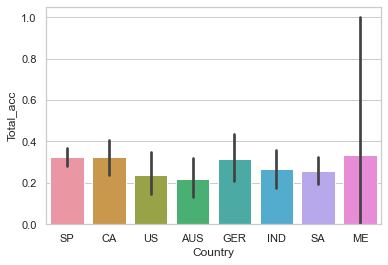

In [74]:
sns.barplot(y=data['Total_acc'],x=data['Country'])

#### Which marketing campaign is most successful?

In [85]:
data_plot = pd.DataFrame(data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].mean()*100,columns=['Percent']).reset_index()

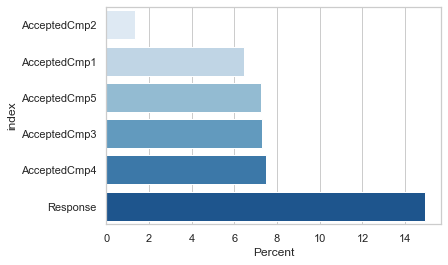

In [87]:
sns.barplot(x='Percent', y='index', data=data_plot.sort_values('Percent'), palette='Blues')

#### What does the average customer look like for this company?

In [91]:
# list of cols with binary responses
binary_cols = [col for col in data.columns if 'Accepted' in col] + ['Response', 'Complain']

# list of cols for spending 
mnt_cols = [col for col in data.columns if 'Mnt' in col]

# list of cols for channels
channel_cols = [col for col in data.columns if 'Num' in col] + ['Total_purchase', 'Total_acc']

In [92]:
# average customer demographics
demographics = pd.DataFrame(round(data.drop(columns=binary_cols+mnt_cols+channel_cols).mean(), 1), columns=['Average']).reindex(['Year_Birth', 'Year_Customer', 'Income', 'Dependents', 'Kidhome', 'Teenhome', 'Recency'])

demographics

,Average
Year_Birth,1968.9
Year_Customer,2013.0
Income,52227.4
Dependents,NaN
Kidhome,0.4
Teenhome,0.5
Recency,49.1


#### Which products are performing best?

Text(0, 0.5, 'Amount spent on...')

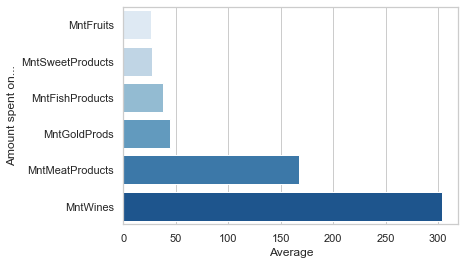

In [93]:
spending = pd.DataFrame(round(data[mnt_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=spending, palette='Blues')
plt.ylabel('Amount spent on...')

#### Which channels are underperforming?

Text(0, 0.5, 'Number of...')

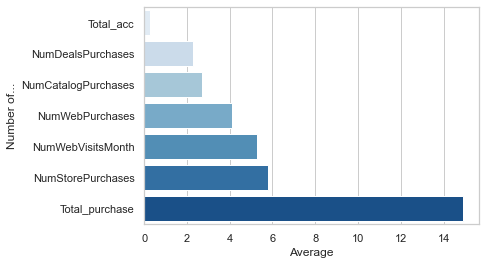

In [94]:
channels = pd.DataFrame(round(data[channel_cols].mean(), 1), columns=['Average']).sort_values(by='Average').reset_index()

# plot
ax = sns.barplot(x='Average', y='index', data=channels, palette='Blues')
plt.ylabel('Number of...')